In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#cargo los archivos csv

p_educacion = pd.read_csv('data/fiuba_1_postulantes_educacion.csv')
p_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
#cargo los archivos csv
p_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [3]:
#cargo archivo csv de las vistas
visitas = pd.read_csv('../data/fiuba_3_vistas.csv')
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [2]:
#cargo csv de postulaciones
postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [39]:
p_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

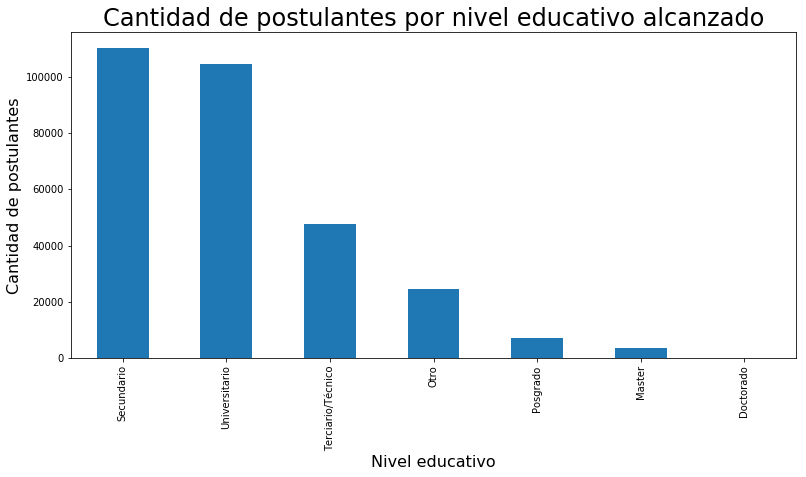

In [57]:
fig = plt.figure()

ax = p_educacion['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por nivel educativo alcanzado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [58]:
p_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

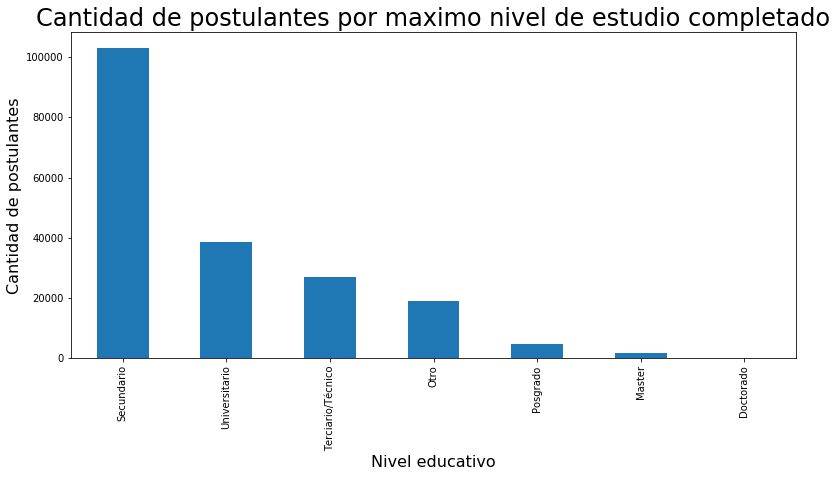

In [7]:
filtered = p_educacion.loc[(p_educacion.estado=='Graduado')]

fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por maximo nivel de estudio completado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [9]:
#¿Cuáles con los niveles de estudio con mayor desercion?
filtered = p_educacion.loc[(p_educacion.estado=='Abandonado')]

filtered['nombre'].value_counts()

Universitario        14955
Terciario/Técnico     5692
Secundario            3156
Otro                   947
Posgrado               317
Master                 144
Doctorado               15
Name: nombre, dtype: int64

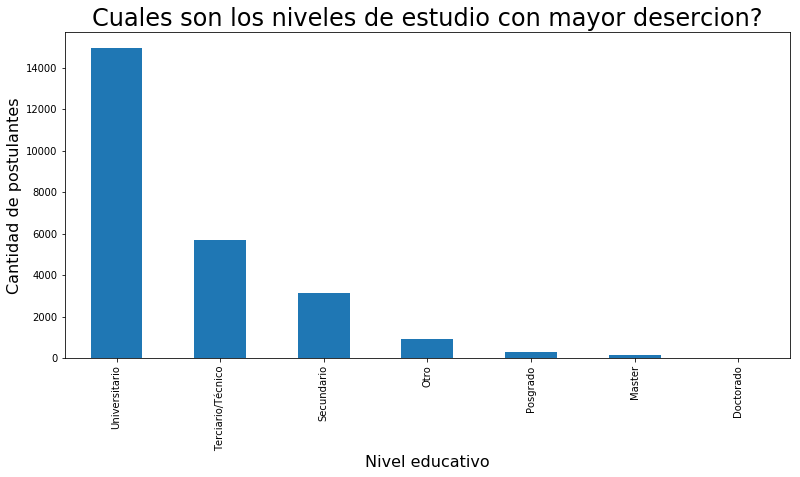

In [10]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cuales son los niveles de estudio con mayor desercion?', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [11]:
#¿Cuales son los niveles de estudio con mayor numero de estudiantes que se postulan?
filtered = p_educacion.loc[(p_educacion.estado=='En Curso')]

filtered['nombre'].value_counts()

Universitario        50733
Terciario/Técnico    15032
Otro                  4919
Secundario            3995
Posgrado              2239
Master                1519
Doctorado               94
Name: nombre, dtype: int64

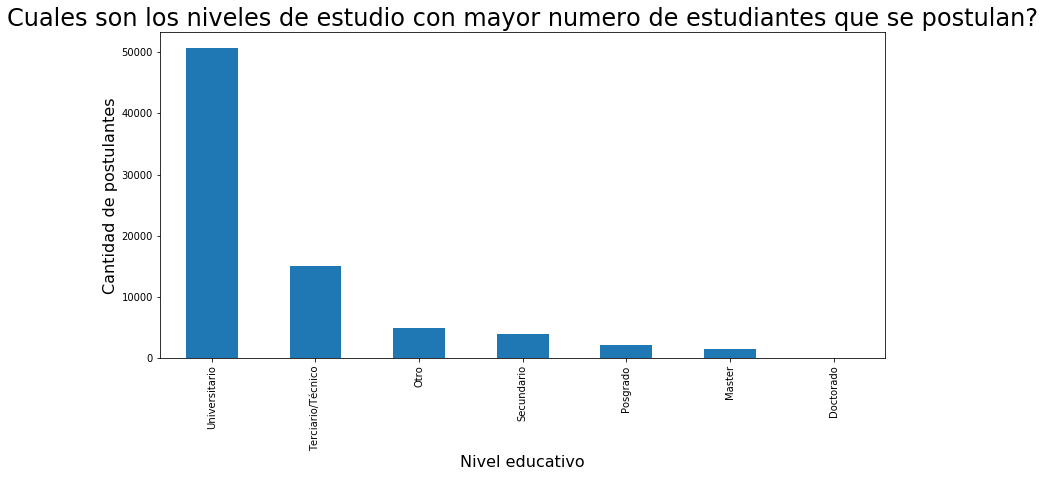

In [13]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cuales son los niveles de estudio con mayor numero de estudiantes que se postulan?', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

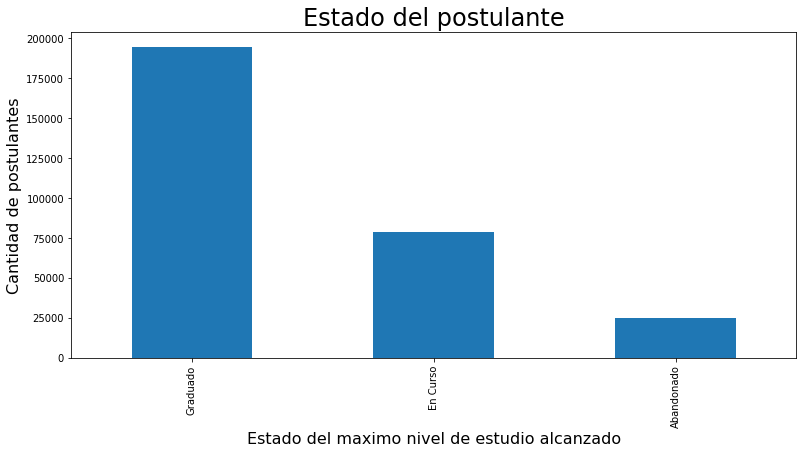

In [5]:
#Creo que este gráfico es innecesario

fig = plt.figure()

ax = p_educacion['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Estado del postulante', fontsize=24)

ax.set_xlabel('Estado del maximo nivel de estudio alcanzado', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [61]:
p_genero_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [62]:
p_genero = p_genero_edad.loc[(p_genero_edad.sexo=='FEM') | (p_genero_edad.sexo=='MASC')]

In [63]:
p_genero['sexo'].value_counts()

FEM     101981
MASC     94339
Name: sexo, dtype: int64

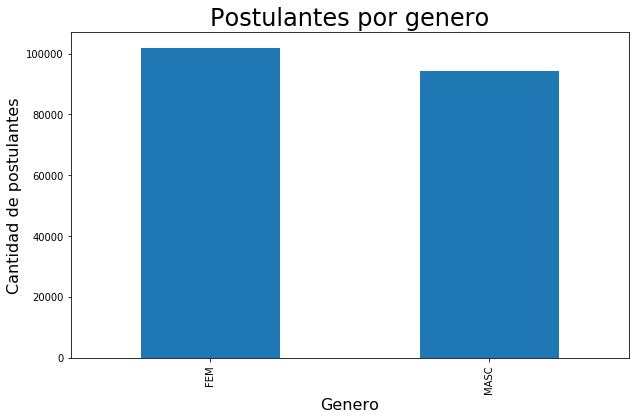

In [64]:
fig = plt.figure()

ax = p_genero['sexo'].value_counts().plot(kind='bar',figsize=(10,6));

plt.title('Postulantes por genero', fontsize=24)

ax.set_xlabel('Genero', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [65]:
p_genero_edad.dtypes

idpostulante       object
fechanacimiento    object
sexo               object
dtype: object

In [67]:
#Convertimos fechanacimiento al formato de fechas
p_genero_edad.fechanacimiento = pd.to_datetime(p_genero_edad.fechanacimiento, format='%Y/%m/%d')
p_genero_edad['year'] = p_genero_edad['fechanacimiento'].map(lambda x: x.year)
p_genero_edad['month'] = p_genero_edad.fechanacimiento.dt.month.apply(lambda x: calendar.month_name[x])
p_genero_edad['Periodo'] = p_genero_edad['fechanacimiento'].map(lambda x: x.strftime('%Y-%m'))

ValueError: time data '0031-12-11' doesn't match format specified

In [69]:
#Antes de la convrsion, primero hay que limpiar las fechas defectuosas

In [ ]:
#*************************************************************************************************************#

In [2]:
#cargo archivo csv de las vistas
visitas = pd.read_csv('../data/fiuba_3_vistas.csv')
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [3]:
#cargo csv de postulaciones
postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [4]:
#cargo csv de detalle de avisos
avisos_detalle = pd.read_csv('../data/fiuba_6_avisos_detalle.csv')
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [5]:
#avisos con mayor cantidad de postulantes

#Este código ya se encuentra en el Tp1-completo en la parte de "Analisis mas complejo de datos", solo agregue
#un nombre y el reset index
cantidadDePostulantes = postulaciones.groupby('idaviso').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending=False)\
                     .rename(columns={"idpostulante": "cantidad_postulantes"})   
    
cantidadDePostulantes = cantidadDePostulantes.reset_index()

In [6]:
#A partirde acá NO está en el TP1-completo

In [7]:
visitas = visitas.rename(columns={'idAviso':'idaviso'});

In [8]:
#avisos con mayor cantidad de visitas
cantidadDeVisitas = visitas.groupby('idaviso').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending=False)\
                     .rename(columns={"idpostulante": "cantidad_visitas"})   
    
cantidadDeVisitas = cantidadDeVisitas.reset_index()

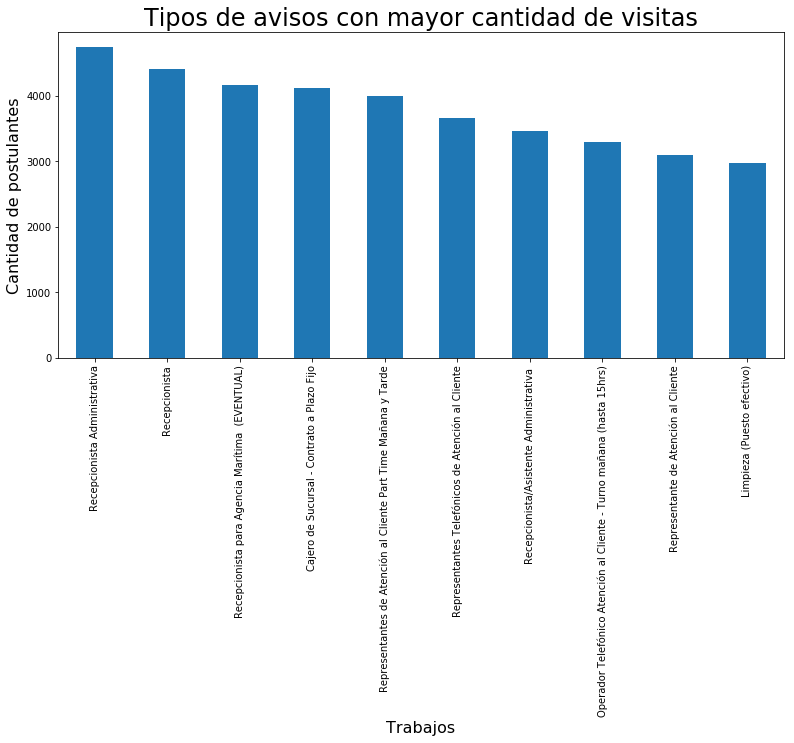

In [9]:
mergeVisitasDetalle = pd.merge(visitas,avisos_detalle,on="idaviso",how="left")

fig = plt.figure()

ax = mergeVisitasDetalle['titulo'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Tipos de avisos con mayor cantidad de visitas', fontsize=24)

ax.set_xlabel('Trabajos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [10]:
mergeRelacion = pd.merge(cantidadDeVisitas,cantidadDePostulantes,on="idaviso",how="inner");
mergeRelacion.head()

,idaviso,cantidad_visitas,cantidad_postulantes
0,1112363488,4169,1244
1,1112359836,4120,4454
2,1112352317,4003,4194
3,1112366909,3669,2885
4,1112355872,3472,3356


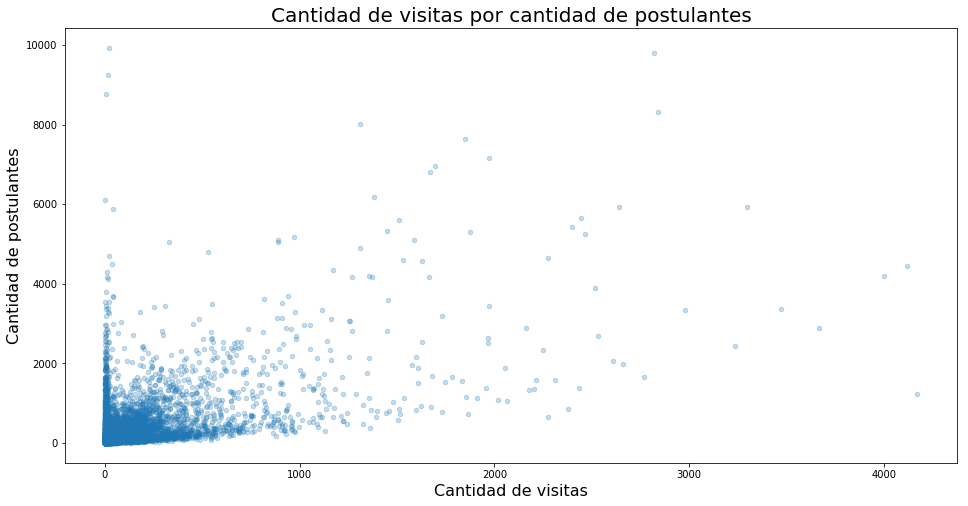

In [11]:
fig = plt.figure()
ax = mergeRelacion.plot.scatter('cantidad_visitas','cantidad_postulantes', alpha=0.25,figsize=(16,8));

ax.set_title('Cantidad de visitas por cantidad de postulantes', fontsize=20)
ax.set_xlabel('Cantidad de visitas', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [4]:
###########################################################################################
###########################################################################################

In [5]:
#Cambio la fecha a datetime
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
print(postulaciones['fechapostulacion'].max())
print(postulaciones['fechapostulacion'].min())

2018-02-28 23:59:55
2018-01-15 00:00:01


In [6]:
#Cambio timestamp a datetime
visitas['timestamp'] = pd.to_datetime(visitas['timestamp'])
print(visitas['timestamp'].max())
print(visitas['timestamp'].min())

2018-03-01 04:59:56.812000
2018-02-23 18:38:10.808000


In [7]:
postulaciones['dia_semana'] = postulaciones['fechapostulacion'].dt.weekday_name

In [8]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday


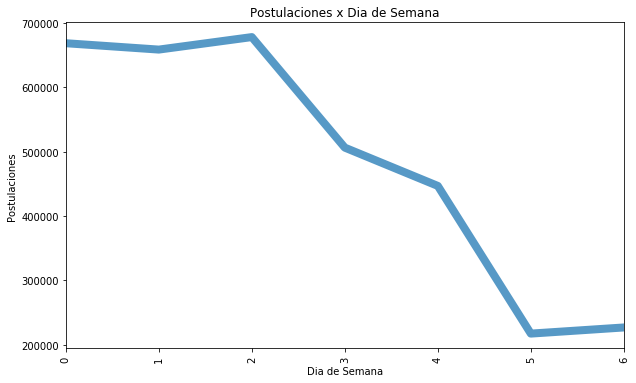

In [9]:
#este habria que cambiar los numeros por los nombres de los dias
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
#dt.weekday.value_counts().sort_index() 
postulaciones['fechapostulacion'].dt.weekday.value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(10,6),alpha=0.75)

plt.show()

Postulaciones por dia del mes

In [11]:
#Postulaciones enero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] < '02-01-2018']

In [12]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes.loc[:,'fechapostulacion'].dt.day

/home/german/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,dia_mes
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,15
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,25
5,1112277633,5awk,2018-01-29 13:34:44,Monday,29
20,1112286523,ZaO5,2018-01-24 15:07:39,Wednesday,24
21,1112272060,ZaO5,2018-01-24 15:20:10,Wednesday,24


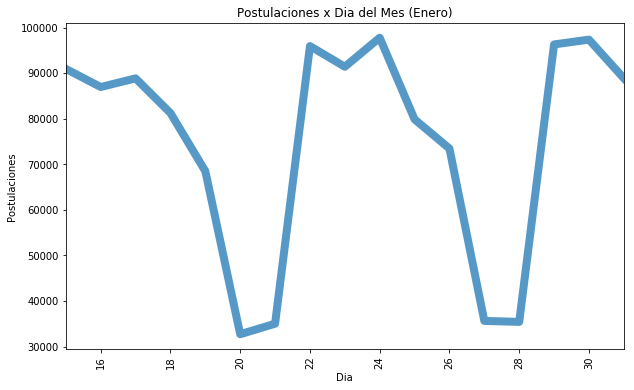

In [14]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Enero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postulaciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(10,6),alpha=0.75)

plt.show()

In [15]:
#Postulaciones febrero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] >= '02-01-2018']

In [16]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes['fechapostulacion'].dt.day

/home/german/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


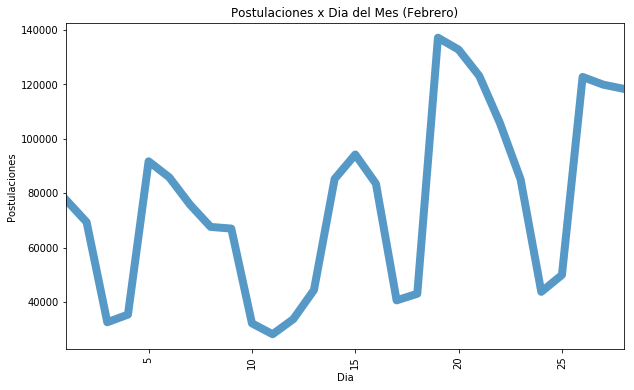

In [17]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Febrero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postulaciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(10,6),alpha=0.75)

plt.show()

Datos de vistas

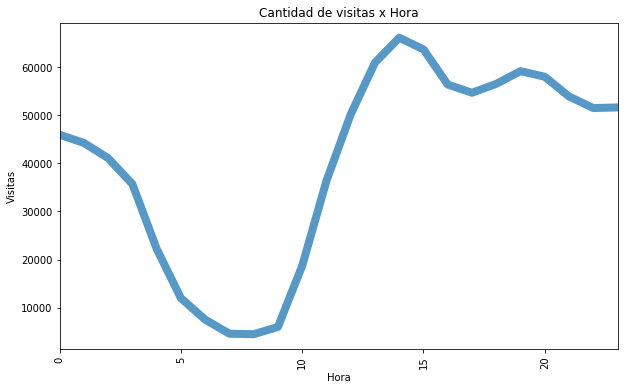

In [18]:
#lo mismo que el anterior pero por cada hora
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x Hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.hour.value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(10,6),alpha=0.75)

plt.show()

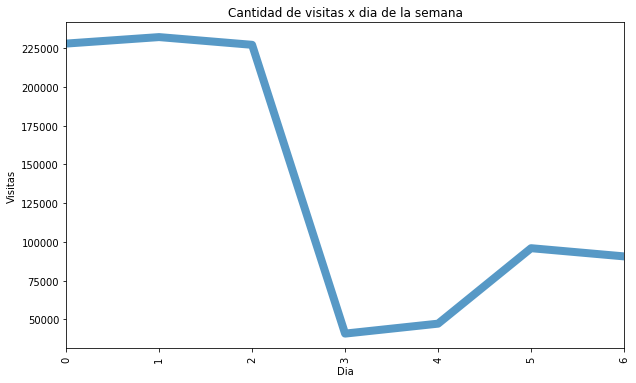

In [19]:
#agregar nombre de los dias de la semana
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x dia de la semana')
ax.set_xlabel('Dia')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.weekday.value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(10,6),alpha=0.75)

plt.show()